# Limpieza de bienes ra√≠ces

Este es un conjunto de datos (dataset) reales que fue descargado usando t√©cnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios m√°s populares de bienes ra√≠ces en Espa√±a. Por favor no hagas esto (web scraping) a no ser que sea para prop√≥sitos acad√©micos.

El dataset fue descargado hace algunos a√±os por Henry Navarro y en ning√∫n caso se obtuvo beneficio econ√≥mico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta informaci√≥n como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¬øcu√°l es la casa m√°s cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¬°Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (‚òÖ‚òÜ‚òÜ)

üî•Step 0.0: Importar Librerias

In [101]:
# Librerias Basicas en requirements original:

# pip install -r requirements.txt

# Base ----------------------------------------
# pandas>=1.5.3
# numpy>=1.24.2
# opencv-python>=4.1.2
# matplotlib>=3.7.0
# ipyleaflet>=0.14.0
# jupyter_contrib_nbextensions

# Machine learning ----------------------------
# scikit-learn

# En la terminal ------------------------------
# Cargo librerias de requirements file: python -m pip install -r requirements.txt
# Actualizo archivo requirements.txt: python -m pip freeze > requirements.txt

In [102]:
import logging

''' Librerias de Datos: '''
import pandas as pd
import numpy as np

''' Librerias Graficas: '''
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium 
from folium.plugins import MarkerCluster


üî• Step 0.1: Importar / definir los modulos o funcinoes necesarias. 
>   Los modulos son scripts de python que generalmente tienen algunas funciones definidas para agilitar el proceso. 

In [103]:
''' 
En este caso definiremos la funcion:
üìåüìåüìå count_nan_zeros_uniques üìåüìåüìå
que se encargue de contar los nan (not a number), los zeros y los valores unicos para cada columna de mi df.
'''
def count_nan_zeros_uniques(df): # El argumento que le pasamos a la funcion es un dataframe
    nan_zeros_uniques = {}       # Generamos un diccionario vacio
    for col in df.columns: # Generamos un loop que mire cada columna del dataframe y
        total_count = len(df[col]) # Cuente el nro de observaciones (filas) 
        nan_count = df[col].isna().sum()  # Cuente el nro de nan en cada columna 
        zero_count = (df[col]==0).sum()  # Cuente el nro de zeros en cada columna 
        unique_count = df[col].nunique()  # Cuente el nro de valores unicos que hay en cada columna 
        nan_zeros_uniques[col] = { # Guardo los valores obtenidos, en las siguientes claves del diccionario
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros_uniques, orient = "index") 
# Convierto ese diccionario en un dataframe. 
# Orient ="Index" indica la forma en la que quiero que despliegue la info.
# .T transpone la data, si eso nos quedara mas comodo.

üî•Step 1: Guardamos el dataset / dataframe como df_raw.

In [104]:
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
df_raw = pd.read_csv('assets/real_estate.csv', sep=';')

üî•Step 2: Antes que nada, investigamos el dataframe con .info()

In [105]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

üî• Step 3: Seguimos investigando el dataset, pero ahora con .sample(10, random_state=2025) 

In [106]:
df_raw.sample(10, random_state=2025)

Unnamed: 0  id_realEstates  isNew  \
11956       11957       153704529  False   
7285         7286       150530836  False   
14035       14036       153921873  False   
10823       10824       150512853  False   
5778         5779       148949209  False   
11905       11906       153945932  False   
3319         3320       152564823  False   
2345         2346       152424227  False   
2453         2454       153258497  False   
3656         3657       153552213  False   

                                 realEstate_name  phone_realEstate  \
11956                                 habita mad       918007061.0   
7285        desarrollo de viviendas nueva ciudad       916358709.0   
14035                                  garsierra       912179623.0   
10823                                 covibarges       912175971.0   
5778                                       urban       912780256.0   
11905  aliseda servicios de gestion inmobiliaria       911368198.0   
3319                                 aproperties       914890879.0   
2345                                    mr house       911369017.0   
2453                        engel volkers madrid       910758015.0   
3656               villa gestiones inmobiliarias               NaN   

                                            url_inmueble  rooms  bathrooms  \
11956  https://www.fotocasa.es/es/comprar/vivienda/gu...    3.0        1.0   
7285   https://www.fotocasa.es/vivienda/alcala-de-hen...    3.0        2.0   
14035  https://www.fotocasa.es/es/comprar/vivienda/ti...    1.0        2.0   
10823  https://www.fotocasa.es/vivienda/arganda-del-r...    3.0        2.0   
5778   https://www.fotocasa.es/es/comprar/vivienda/pa...    4.0        4.0   
11905  https://www.fotocasa.es/es/comprar/vivienda/ma...    NaN        NaN   
3319   https://www.fotocasa.es/es/comprar/vivienda/ma...    4.0        3.0   
2345   https://www.fotocasa.es/es/comprar/vivienda/pa...    2.0        2.0   
2453   https://www.fotocasa.es/es/comprar/vivienda/tr...    NaN        6.0   
3656   https://www.fotocasa.es/es/comprar/vivienda/sa...    3.0        1.0   

       surface    price  ... level4Id level5Id level6Id level7Id level8Id  \
11956     72.0   214000  ...        0        0        0        0        0   
7285     112.0   243800  ...        0        0        0        0        0   
14035     72.0    85000  ...        0        0        0        0        0   
10823    107.0   255000  ...        0        0        0        0        0   
5778       NaN   439000  ...        0        0        0        0        0   
11905    100.0   152250  ...        0        0        0        0        0   
3319     200.0  1320000  ...        0        0        0        0        0   
2345      81.0   149500  ...        0        0        0        0        0   
2453     480.0   870000  ...        0        0        0        0        0   
3656      82.0   127500  ...        0        0        0        0        0   

      accuracy    latitude   longitude zipCode customZone  
11956        0    40,46449    -3,63265     NaN        NaN  
7285         0    40,23768    -3,77423     NaN        NaN  
14035        1  40,5506749  -3,3772946     NaN        NaN  
10823        1    40,38219    -3,53069     NaN        NaN  
5778         0    40,39723    -3,99894     NaN        NaN  
11905        1    40,47349    -3,36515     NaN        NaN  
3319         0    40,42092    -3,69983     NaN        NaN  
2345         0  40,2367357  -3,7684312     NaN        NaN  
2453         0    40,59254    -3,58344     NaN        NaN  
3656         0     40,3955    -3,66676     NaN        NaN  

[10 rows x 37 columns]

üî• Step 4:  
   Luego del sample, seguimos investigando el df, identificando, nan, zeros, y valores unicos de cada columna 
> Para esto usamos la funcion que definimos mas arriba count_nan_zeros  
> Tip:  
> Esta funcion nos servira para todos los dataframes en los que trabajemos. Asi que sera util agregarla al importar librerias. 

In [107]:
count_nan_zeros_uniques(df_raw)

NaNs  Zeros  Uniques
Unnamed: 0            0      0    15335
id_realEstates        0      0    14217
isNew                 0  15198        2
realEstate_name      10      0     1821
phone_realEstate    794      0     1807
url_inmueble          0      0      493
rooms               353      0       17
bathrooms           345      0       14
surface            1250      0      728
price                 0     60     2633
date                  0      0     4481
description         142      0    11966
address               0      0     5260
country               0      0        1
level1                0      0        1
level2                0      0        1
level3                0      0        7
level4             6643      0       77
level5                0      0      168
level6            14627      0       19
level7             2277      0      247
level8             8579      0      143
upperLevel            0      0      512
countryId             0  15335        1
level1Id              0  15335        1
level2Id              0  15335        1
level3Id              0  15335        1
level4Id              0  15335        1
level5Id              0  15335        1
level6Id              0  15335        1
level7Id              0  15335        1
level8Id              0  15335        1
accuracy              0  12776        2
latitude              0      0    10865
longitude             0      0    10734
zipCode           15335      0        0
customZone        15335      0        0

In [108]:
# Esto nos sirve para tomar desiciones. 
# Ejemplo:

#üü° COLUMNAS CON UN SOLO VALOR UNICO: 
    # los datos con un solo valor unico no tienen variabilidad, 
    # la ausencia de variabilidad me quita especificacion, me quita explicacion 
    # Implica ausencia de Analisis, de Explicabilidad, AUSENCIA DE PREDICTIBILIDAD. 
    # por lo tanto esas columnas las quito.
    # Si tengo un grupo de peruanos, donde todos son peruanos. Que tengo para explicar? 
    # Nada, mas que todos son peruanos.

    # "country", level1, level2, countryId, level1Id hasta level8Id 

#üü° COLUMNAS QUE SOLO CONTIENEN nans: 
    # Columnas que tienen = cantidad de Nans y Filas.
    # No aportan informacion, asi que las sacamos.

    # zipCode, customZone


#üü° COLUMNAS CON = cantidad de Uniques que Raws: 
    # Columnas que tienen = cantidad de Uniques y Filas.
    # Generalmente son los Id Fields.
    # No aportan informacion, asi que las sacamos.

    # Unnamed:0


üî• Step 5: generamos el dataframe df_baking, para comenzar a limpiar el dataframe


In [109]:
# NUNCA HACEMOS TRANSFORMACIONES CON RAW. 

df_baking = df_raw.copy() # Copio el rawdata y lo guardo en df_baking

üî• Step 6: Eliminamos todas las columnas que no sirven, y modificamos el tipo de datos si corresponde. 

In [110]:
# Como vimos en steps anteriores, la primer y ultimas dos columnas no sirven.
# Las eliminamos de esta forma:
df_baking = df_baking.iloc[:,1:-2] 
# ‚Üí iloc selecciona informacion en base al nro de la fila y la columna. 
#   al dejar el primer parametro vacio, le estoy diciendo que quiero todas las filas.
# ‚Üí Con "1:-2" Como se le este slicing:  No voy a tomar ni la primer columna (la columna 0), 
#   ni la penultima, ni la ultima.


# Ahora eliminamos con .drop([]) el resto de las columnas que no sirven, colocando axis =1 
# para indicar que son columnas.
# No es buena practica tener que scrollear para leer una linea, asi que lo hacemos en partes.
df_baking = df_baking.drop(['country','level1','level2'], axis = 1)
df_baking = df_baking.drop(['countryId','level1Id','level2Id','level3Id','level4Id'], axis = 1)
df_baking = df_baking.drop(['level5Id','level6Id','level7Id','level8Id'], axis = 1)

# Ahora modificaremos el tipo de datos para longitud y latitud, ya que la separacion decimal llego como 
# "," y debe ser "." para que reconozca esos valores como decimales y no como object:
df_baking['latitude'] = df_baking['latitude'].apply(lambda x: float( x.replace("," , ".")))
df_baking['longitude'] = df_baking['longitude'].apply(lambda x: float( x.replace("," , ".")))


üî• Step 7: Definimos el data frame definitivo con el que trabajare usando .copy() y lo revisamos con .info()

In [111]:
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    15335 non-null  int64  
 1   isNew             15335 non-null  bool   
 2   realEstate_name   15325 non-null  object 
 3   phone_realEstate  14541 non-null  float64
 4   url_inmueble      15335 non-null  object 
 5   rooms             14982 non-null  float64
 6   bathrooms         14990 non-null  float64
 7   surface           14085 non-null  float64
 8   price             15335 non-null  int64  
 9   date              15335 non-null  object 
 10  description       15193 non-null  object 
 11  address           15335 non-null  object 
 12  level3            15335 non-null  object 
 13  level4            8692 non-null   object 
 14  level5            15335 non-null  object 
 15  level6            708 non-null    object 
 16  level7            13058 non-null  object

#### Ejercicio 01. ¬øCu√°l es la casa m√°s cara en todo el dataset? (‚òÖ‚òÜ‚òÜ)

Imprime la direcci√≥n y el precio de la casa seleccionada. Por ejemplo:

`La casa con direcci√≥n en Calle del Prado, N¬∫20 es la m√°s cara y su precio es de 5000000 USD`

In [112]:
indice_maximo = df.loc[df['price'].idxmax()]
address = indice_maximo["address"]
price =  indice_maximo['price']
print(f'La casa con la direccion en {address} es la mas cara y su precio es de {price} USD')

# ‚ñ∂  Explicaci√≥n por Pasos de Ejecuci√≥n en el Flujo del C√≥digo ‚óÄ:

#   ‚óØ df['price'].idxmax()
#       ‚Üí df['price'] selecciona la columna de precios dentro del DataFrame df.
#       ‚Üí .idxmax() devuelve el √≠ndice de la fila con el valor m√°s alto en esa columna.
#       ‚Üí Qu√© significa "√≠ndice" en este contexto?
#       ‚Üí El √≠ndice (index) en un DataFrame es el identificador √∫nico de cada fila.

#   ‚óØ df.loc[df['price'].idxmax()]
#       ‚Üí df.loc[...] se usa para seleccionar la fila completa correspondiente al √≠ndice obtenido en el paso anterior.
#       ‚Üí indice_maximo almacena toda la informaci√≥n de la casa m√°s cara.

#   ‚óØ Extraer la direcci√≥n y el precio:
#       ‚Üí address = indice_maximo["address"] obtiene la direcci√≥n de la casa.
#       ‚Üí price = indice_maximo['price'] obtiene el precio de la casa.

#   ‚óØ Imprimir el resultado:
#       ‚Üí La f-string (f'...') permite insertar variables dentro del texto de manera m√°s clara y legible.
#       ‚Üí El mensaje final imprime la direcci√≥n y el precio de la casa m√°s cara.



La casa con la direccion en El Escorial es la mas cara y su precio es de 8500000 USD


#### Ejercicio 02. ¬øCu√°l es la casa m√°s barata del dataset? (‚òÖ‚òÜ‚òÜ)

Imprime la direcci√≥n y el precio de la casa seleccionada. Por ejemplo:

`La casa con direcci√≥n en Calle Alcal√°, N¬∫58 es la m√°s barata y su precio es de 12000 USD`

In [113]:
df_filtrado = df[df['price']> 0]
indice_minimo = df_filtrado.loc[df_filtrado['price'].idxmin()]
address = indice_minimo["address"]
price =  indice_minimo['price']
print(f'La casa con la direccion en {address} es la mas barata y su precio es de {price} USD')

# ‚ñ∂  Explicaci√≥n por Pasos de Ejecuci√≥n en el Flujo del C√≥digo: ‚óÄ 

# ‚óØ Filtrar casas con precio mayor a 0   
#    df_filtrado = df[df['price'] > 0]
#    ‚Üí Se crea un nuevo DataFrame df_filtrado que solo contiene las filas donde el precio (price) es mayor a 0.
#    ‚Üí Esto evita considerar datos incorrectos como 0 o valores negativos en la b√∫squeda de la casa m√°s barata.

# ‚óØ Encontrar la casa con el precio m√°s bajo 
#    indice_minimo = df_filtrado.loc[df_filtrado['price'].idxmin()]
#    ‚Üí df_filtrado['price'].idxmin() obtiene el √≠ndice de la casa con el menor precio dentro del conjunto filtrado.
#    ‚Üí df_filtrado.loc[...] recupera la fila completa correspondiente a ese √≠ndice.

# ‚óØ Extraer informaci√≥n de la casa m√°s barata 
#    address = indice_minimo["address"]  # Obtiene la direcci√≥n
#    price = indice_minimo['price']  # Obtiene el precio
#    ‚Üí address almacena la direcci√≥n de la casa con el precio m√°s bajo.
#    ‚Üí price almacena el precio de esa casa.

# ‚óØ Mostrar el resultado en pantalla 
#    print(f'La casa con la direccion en {address} es la mas barata y su precio es de {price} USD')
#    ‚Üí Se usa una f-string para imprimir la direcci√≥n y el precio de la casa m√°s barata en un formato amigable.


La casa con la direccion en Berlin, Coslada es la mas barata y su precio es de 600 USD


#### Ejercicio 03. ¬øCu√°l es la casa m√°s grande y la m√°s peque√±a del dataset? (‚òÖ‚òÜ‚òÜ)

Imprime la direcci√≥n y el √°rea de las casas seleccionadas. Por ejemplo:

`La casa m√°s grande est√° ubicada en Calle Gran V√≠a, N¬∫38 y su superficie es de 5000 metros`

`La casa m√°s peque√±a est√° ubicada en Calle Mayor, N¬∫12 y su superficie es de 200 metros`

In [114]:
indice_maximo = df_filtrado.loc[df_filtrado['surface'].idxmax()]
address = indice_maximo["address"]
surface =  indice_maximo['surface']
print(f'La casa mas grande esta ubicada en {address} y su superficie es de {surface} metros')

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el Flujo del √≥digo‚óÄ:

#   ‚óØ df_filtrado['surface'].idxmax()
#       ‚Üí df_filtrado['surface'] selecciona la columna de superficies dentro del DataFrame df_filtrado.
#       ‚Üí .idxmax() devuelve el √≠ndice de la fila con el valor m√°s grande en la columna surface.
#       ‚Üí ¬øQu√© significa "√≠ndice" en este contexto?
#       ‚Üí El √≠ndice (index) en un DataFrame es el identificador √∫nico de cada fila.

#   ‚óØ df_filtrado.loc[df_filtrado['surface'].idxmax()]
#       ‚Üí df_filtrado.loc[...] se usa para seleccionar la fila completa correspondiente al √≠ndice obtenido en el paso anterior.
#       ‚Üí indice_maximo almacena toda la informaci√≥n de la casa con la mayor superficie.

#   ‚óØ Extraer la direcci√≥n y la superficie:
#       ‚Üí address = indice_maximo["address"] obtiene la direcci√≥n de la casa con mayor superficie.
#       ‚Üí surface = indice_maximo['surface'] obtiene la superficie de la casa m√°s grande.

#   ‚óØ Imprimir el resultado:
#       ‚Üí La f-string (f'...') permite insertar variables dentro del texto de manera m√°s clara y legible.
#       ‚Üí El mensaje final imprime la direcci√≥n y la superficie de la casa m√°s grande.



indice_minimo = df_filtrado.loc[df_filtrado['surface'].idxmin()]
address = indice_minimo["address"]
surface =  indice_minimo['surface']
print(f'La casa mas peque√±a esta ubicada en {address} y su superficie es de {surface} metros')

# ‚ñ∂  Explicaci√≥n por Pasos de Ejecuci√≥n en el Flujo del C√≥digo ‚óÄ:

#   ‚óØ df_filtrado['surface'].idxmin()
#       ‚Üí df_filtrado['surface'] selecciona la columna de superficies dentro del DataFrame df_filtrado.
#       ‚Üí .idxmin() devuelve el √≠ndice de la fila con el valor m√°s peque√±o en la columna surface.
#       ‚Üí ¬øQu√© significa "√≠ndice" en este contexto?
#       ‚Üí El √≠ndice (index) en un DataFrame es el identificador √∫nico de cada fila.

#   ‚óØ df_filtrado.loc[df_filtrado['surface'].idxmin()]
#       ‚Üí df_filtrado.loc[...] se usa para seleccionar la fila completa correspondiente al √≠ndice obtenido en el paso anterior.
#       ‚Üí indice_minimo almacena toda la informaci√≥n de la casa con la menor superficie.

#   ‚óØ Extraer la direcci√≥n y la superficie:
#       ‚Üí address = indice_minimo["address"] obtiene la direcci√≥n de la casa con menor superficie.
#       ‚Üí surface = indice_minimo['surface'] obtiene la superficie de la casa m√°s peque√±a.

#   ‚óØ Imprimir el resultado:
#       ‚Üí La f-string (f'...') permite insertar variables dentro del texto de manera m√°s clara y legible.
#       ‚Üí El mensaje final imprime la direcci√≥n y la superficie de la casa m√°s peque√±a.




La casa mas grande esta ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros
La casa mas peque√±a esta ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¬øCuantas poblaciones (columna level5) contiene el dataset? (‚òÖ‚òÜ‚òÜ)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [115]:
# Obtener las poblaciones √∫nicas en la columna level5
populations = df['level5'].unique() # Devuelve una lista

# Imprimir el n√∫mero de poblaciones
print(f'N√∫mero de poblaciones: {len(populations)}')

# Imprimir los nombres de las poblaciones separadas por coma
populations_str = ', '.join(populations)
print(populations_str)


# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df['level5'].unique()
#       ‚Üí df['level5'] selecciona la columna 'level5' del DataFrame df.
#       ‚Üí .unique() devuelve una lista con los valores √∫nicos (sin repeticiones) presentes en esa columna.
#       ‚Üí En este caso, devuelve las poblaciones √∫nicas encontradas en la columna 'level5'.

#   ‚óØ print(f'N√∫mero de poblaciones: {len(populations)}')
#       ‚Üí len(populations): calcula la cantidad de elementos en la lista 'populations' (el n√∫mero de poblaciones √∫nicas).
#       ‚Üí La f-string (f'...') inserta este valor dentro del texto para imprimirlo de manera clara.

#   ‚óØ populations_str = ', '.join(populations)
#       ‚Üí ', '.join(populations): une todos los elementos de la lista 'populations' en un solo string, separ√°ndolos por coma y espacio.
#       ‚Üí populations_str almacena la cadena resultante, que tiene todos los nombres de las poblaciones separados por coma.

#   ‚óØ print(populations_str)
#       ‚Üí Imprime el string 'populations_str', que contiene los nombres de las poblaciones separados por coma.


N√∫mero de poblaciones: 168
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Od√≥n, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarc√≥n, Torrej√≥n de Ardoz, Navalagamella, San Sebasti√°n de los Reyes, Rivas-vaciamadrid, Alpedrete, M√≥stoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcal√° de Henares, Chinch√≥n, Parla, Alcorc√≥n, El Escorial, Legan√©s, Pedrezuela, Majadahonda, Villanueva de la Ca√±ada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Mart√≠n de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrej√≥n de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Gri√±√≥n, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Mar

#### Ejercicio 05. ¬øEl dataset contiene valores no admitidos (NAs)? (‚òÖ‚òÜ‚òÜ)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [116]:
df.isnull().any(axis=0) 

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df.isnull()
#       ‚Üí df.isnull() aplica la funci√≥n isnull() al DataFrame df.
#       ‚Üí isnull() devuelve un DataFrame de la misma forma, pero con valores booleanos (True o False),
#         donde True indica que el valor en esa celda es nulo (NaN) y False que no lo es.

#   ‚óØ .any(axis=0)
#       ‚Üí .any(axis=0) eval√∫a si existe al menos un valor True en cada columna (es decir, al menos un valor nulo).
#       ‚Üí axis=0 especifica que la operaci√≥n debe realizarse a lo largo de las columnas (por defecto, axis=0 se refiere
#         a las columnas).
#       ‚Üí Si al menos una celda de una columna tiene un valor nulo, el resultado ser√° True para esa columna; de lo contrario,
#         ser√° False.

#   ‚óØ result
#       ‚Üí result almacena un objeto Series con valores booleanos (True o False) indicando si cada columna contiene al menos 
#         un valor nulo.

id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
accuracy            False
latitude            False
longitude           False
dtype: bool

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (‚òÖ‚òÖ‚òÜ)

Imprima una comparaci√≥n entre las dimensiones del DataFrame original versus el DataFrame despu√©s de las eliminaciones.


In [117]:
# Imprimir las dimensiones del DataFrame original
print(f'Dimensiones del DataFrame original: {df.shape}')

# Eliminar las filas que contienen valores nulos en el DataFrame
df.dropna()


# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df.dropna()
#       ‚Üí df.dropna() elimina todas las filas del DataFrame df que contienen al menos un valor nulo (NaN).
#       ‚Üí Este m√©todo no afecta a las columnas que tengan valores nulos, solo elimina las filas completas que contienen nulos.
#       ‚Üí Como no se asigna el resultado a una nueva variable, el DataFrame original `df` se modifica de forma permanente 
#         (si no se usa `inplace=False`).
#       ‚Üí Si se desea evitar modificar el DataFrame original, se debe asignar el resultado a una nueva variable o usar 
#         `inplace=True` para realizar la operaci√≥n directamente en `df`.


# Imprimir las dimensiones del DataFrame despu√©s de las eliminaciones
print(f'Dimensiones del DataFrame despu√©s de eliminar filas con valores nulos: {df.shape}')


#  ‚óØ Si est√°s observando que se eliminan m√°s filas de lo esperado, revisa si hay valores nulos distribuidos en diferentes 
#     columnas, ya que cualquier valor faltante en una fila causar√° que esa fila sea eliminada.

#  ‚óØ Si quieres controlar esto m√°s espec√≠ficamente (por ejemplo, eliminar solo las filas donde todas las columnas son nulas), 
#     puedes usar el par√°metro how:
#      ‚Üí  df.dropna(how='any') elimina las filas con al menos un valor nulo (comportamiento por defecto).
#      ‚Üí  df.dropna(how='all') elimina solo las filas donde todas las columnas son nulas.


#   Excelente Valentina! En la pregunta 6: No se vio ningun cambio en la dimensi√≥n del df porque no registraste los 
#   cambios en un nueva dataframe ni en el mismo.

Dimensiones del DataFrame original: (15335, 22)
Dimensiones del DataFrame despu√©s de eliminar filas con valores nulos: (15335, 22)


#### Ejercicio 07. ¬øCu√°l la media de precios en la poblaci√≥n (columna level5) de "Arroyomolinos (Madrid)"? (‚òÖ‚òÖ‚òÜ)

Imprima el valor obtenido.

In [118]:
aprice = df.query("level5=='Arroyomolinos (Madrid)'")["price"].mean()

# Hay varios metodos en pandas para poder filtrar. 
# El metodo query es mas simple, ya que es facil de leer.


# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df.query("level5=='Arroyomolinos (Madrid)'")
#       ‚Üí df.query(...) permite filtrar el DataFrame usando una expresi√≥n como si fuera una consulta SQL.
#       ‚Üí "level5=='Arroyomolinos (Madrid)'" filtra el DataFrame para obtener solo las filas donde la columna 'level5' 
#          es igual a 'Arroyomolinos (Madrid)'.
#       ‚Üí Esto devuelve un DataFrame con solo las propiedades ubicadas en ese lugar.

#   ‚óØ ["price"]
#       ‚Üí Despu√©s de filtrar, se selecciona la columna 'price' del DataFrame filtrado.
#       ‚Üí Esto nos da solo los valores de precios de las propiedades en Arroyomolinos (Madrid).

#   ‚óØ .mean()
#       ‚Üí .mean() calcula el valor promedio de la columna seleccionada ('price').
#       ‚Üí En este caso, se calcula el precio promedio de las casas en Arroyomolinos (Madrid).

#   ‚óØ .round(1)
#       ‚Üí .round(1) redondea el precio promedio a 1 decimal.
#       ‚Üí Esto da como resultado el precio promedio con un solo decimal para mayor legibilidad.

#   ‚óØ aprice
#       ‚Üí aprice almacena el precio promedio redondeado de las casas en Arroyomolinos (Madrid).


#### Ejercicio 08. Trazar el histograma de los precios para la poblaci√≥n (level5 column) de "Arroyomolinos (Madrid)" y explica qu√© observas (‚òÖ‚òÖ‚òÜ)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve an√°lisis del trazado.


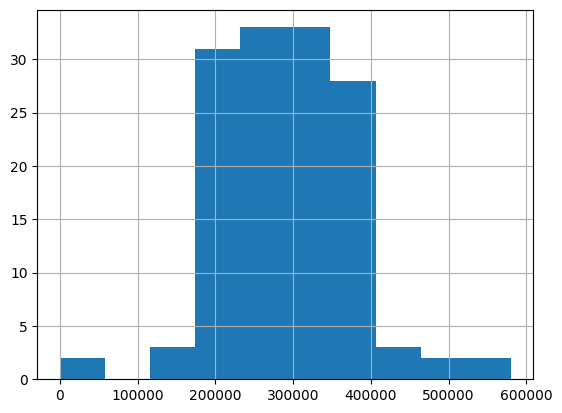

In [119]:
# Graficar el histograma de los precios de las casas en Arroyomolinos (Madrid)
df.query("level5=='Arroyomolinos (Madrid)'")["price"].hist()

# Mostrar la gr√°fica
plt.show()

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df.query("level5=='Arroyomolinos (Madrid)'")
#       ‚Üí df.query(...) permite filtrar el DataFrame usando una expresi√≥n similar a SQL.
#       ‚Üí "level5=='Arroyomolinos (Madrid)'" filtra el DataFrame para obtener solo las filas donde la columna 'level5' es igual a 'Arroyomolinos (Madrid)'.
#       ‚Üí Esto devuelve un DataFrame que contiene solo las propiedades ubicadas en ese lugar.

#   ‚óØ ["price"]
#       ‚Üí Despu√©s de filtrar, se selecciona la columna 'price' del DataFrame filtrado.
#       ‚Üí Esto nos da solo los valores de precios de las propiedades en Arroyomolinos (Madrid).

#   ‚óØ .hist()
#       ‚Üí .hist() genera un histograma de los datos num√©ricos de la columna seleccionada ('price').
#       ‚Üí El histograma muestra la distribuci√≥n de los precios de las casas en Arroyomolinos (Madrid) en forma de barras.

#   ‚óØ plt.show()
#       ‚Üí plt.show() muestra la gr√°fica generada en la ventana de visualizaci√≥n.
#       ‚Üí Esto permite ver el histograma que refleja la distribuci√≥n de los precios de las propiedades.


Se observa que la mayoria de casas estan en el entorno de los 200.000 USD Y 400.000 USD

#### Ejercicio 09. ¬øSon los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (‚òÖ‚òÖ‚òÜ)

Imprime ambos promedios y escribe una conclusi√≥n sobre ellos.

In [120]:
vprice = df.query("level5=='Valdemorillo'")["price"].mean().round(1)
gprice = df.query("level5=='Galapagar'")["price"].mean().round(1)

print(f" No son los mismos")
print(f" El Precio medio de Valdemorillo es: {vprice}")
print(f" El Precio medio de Galapagar es: {gprice}")

 No son los mismos
 El Precio medio de Valdemorillo es: 363860.3
 El Precio medio de Galapagar es: 360063.2


#### Ejercicio 10. ¬øSon los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (‚òÖ‚òÖ‚òÜ)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusi√≥n sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [121]:
# Filtrar las propiedades ubicadas en Valdemorillo o Galapagar y calcular el precio promedio por municipio
filter = df[df['level5'].isin(['Valdemorillo', 'Galapagar'])]

result = (# Encadenar operaciones para calcular el precio promedio
    filter
    .assign(pps = filter['price']/filter['surface'])
    .groupby("level5")['price'].agg('mean').round(1)
) 

# Se ecadenaron operaciones para calcular el precio promedio. 
# El encadenamiento en pandas (Pandas Chain), es una secuencia de operaciones aplicados todos sobre un mismo dataframe. 
# En este caso el encadenamiento debe estar contenido entre los parentesis (), y lo que hizo fue tomar el dataframe filter, 
# genero una variable nueva y calculo la agregacion a partir de una agrupacion.


# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df[df['level5'].isin(['Valdemorillo', 'Galapagar'])]
#       ‚Üí df['level5'].isin(['Valdemorillo', 'Galapagar']) filtra el DataFrame df para seleccionar solo las filas donde
#         la columna 'level5' es igual a 'Valdemorillo' o 'Galapagar'.
#       ‚Üí Esto devuelve un DataFrame llamado 'filter' que contiene solo las propiedades ubicadas en esos dos municipios.

#   ‚óØ .assign(pps = filter['price']/filter['surface'])
#       ‚Üí .assign() se usa para agregar una nueva columna al DataFrame. En este caso, la columna 'pps' representa el
#         precio por metro cuadrado, calculado dividiendo el valor de 'price' entre el valor de 'surface'.
#       ‚Üí El DataFrame resultante ahora incluye la nueva columna 'pps', que contiene el precio por metro cuadrado.

#   ‚óØ .groupby("level5")['price']
#       ‚Üí .groupby("level5") agrupa el DataFrame 'filter' por los valores de la columna 'level5'.
#       ‚Üí Esto crea un grupo para cada municipio ('Valdemorillo' y 'Galapagar').

#   ‚óØ .agg('mean')
#       ‚Üí .agg('mean') calcula el valor promedio de la columna 'price' para cada grupo creado en el paso anterior.
#       ‚Üí En este caso, el resultado es el precio promedio de las propiedades en cada uno de los municipios.

#   ‚óØ .round(1)
#       ‚Üí .round(1) redondea los precios promedio a un decimal para una mayor claridad en la presentaci√≥n.

#   ‚óØ Al ejecutar el codigo se imprime el precio promedio redondeado de las propiedades en 'Valdemorillo' y 'Galapagar'.


# Calcular la diferencia relativa entre los precios promedio de los dos municipios
price_diff = result['Valdemorillo'] - result['Galapagar']

# Imprimir la conclusi√≥n de manera flexible
print(f"El precio promedio por metro cuadrado en Valdemorillo es {result['Valdemorillo']} y en Galapagar es {result['Galapagar']}.")
if price_diff > 0:
    print("En promedio, Valdemorillo tiene un precio por metro cuadrado m√°s alto que Galapagar.")
elif price_diff < 0:
    print("En promedio, Galapagar tiene un precio por metro cuadrado m√°s alto que Valdemorillo.")
else:
    print("Ambos municipios tienen el mismo precio promedio por metro cuadrado.")

print(f"""
Las diferencias de precio podr√≠an variar seg√∫n m√∫ltiples factores, como 
    ‚Üí  la oferta y demanda local, 
    ‚Üí  las caracter√≠sticas de las propiedades,
    ‚Üí  o cambios en el mercado inmobiliario.
""")

El precio promedio por metro cuadrado en Valdemorillo es 363860.3 y en Galapagar es 360063.2.
En promedio, Valdemorillo tiene un precio por metro cuadrado m√°s alto que Galapagar.

Las diferencias de precio podr√≠an variar seg√∫n m√∫ltiples factores, como 
    ‚Üí  la oferta y demanda local, 
    ‚Üí  las caracter√≠sticas de las propiedades,
    ‚Üí  o cambios en el mercado inmobiliario.



#### Ejercicio 11. Analiza la relaci√≥n entre la superficie y el precio de las casas. (‚òÖ‚òÖ‚òÜ)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusi√≥n al respecto.

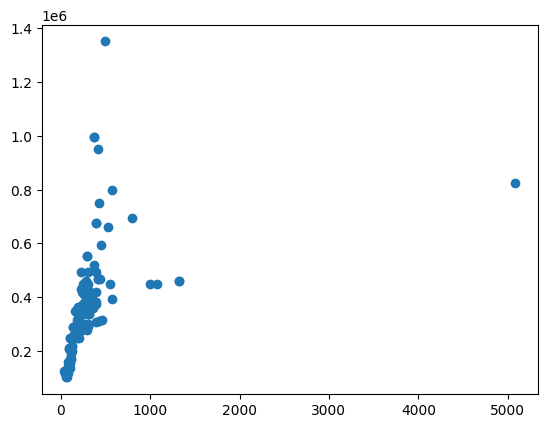

In [122]:
# Crear un gr√°fico de dispersi√≥n (scatter plot) de superficie frente a precio
plt.scatter(filter['surface'], filter['price'])

# Mostrar el gr√°fico
plt.show()

In [123]:
# ‚ñ∂ por qu√© no se ve nada significativo ¬ø? ‚óÄ
    # ‚óØ Este es un problema que generalmente se da al aparecer outliyers, y por eso es b√°sico realizar 
    #    primero un an√°lisis univariado, antes de aplicar el an√°lisis bivariado.
    # ‚óØ En estad√≠stica, hemos visto que es importante identificar los registros que est√°n muy por fuera de los quartiles,
    #    a los cuales les llamamos outliers. Son valores muy extremos, que no aportan ya que son situaciones anomalas, 
    #    generando valores atipicos.
    # ‚óØ Los outliers no deben tomarse en cuenta, ya que ensucian mucho los gr√°ficos, inhabilitando la posibilidad sacar conclusiones.
    #    POR ESO SIEMPRE DEBEMOS HACER UN AN√ÅLISIS UNIVARIADO PREVIAMENTE AL AN√ÅLISIS BIVARIADO.
    # ‚óØ Normalmente, los valores de areas, y precios, del sector inmobilidario, tienen outliers. 
    #       Por ejemplo, para los precios, si hay una super mansion eso ya figurara como un outliner
    #       Por ejemplo, para el area, si hay algun lugar que tiene muchas hectareas y vale poco por estar alejado, 
    #       tambien generara un outlier.

# Que hacemos en estos casos, para poder ver una relacion significativa entre precio y surface:

    # Filtrar los valores que esten mas alla de 3000 en area y quitamos de esta forma los outliers. 
    # Los outliers se presentan basicamente en el eje x (area), el eje y no esta tan mal.


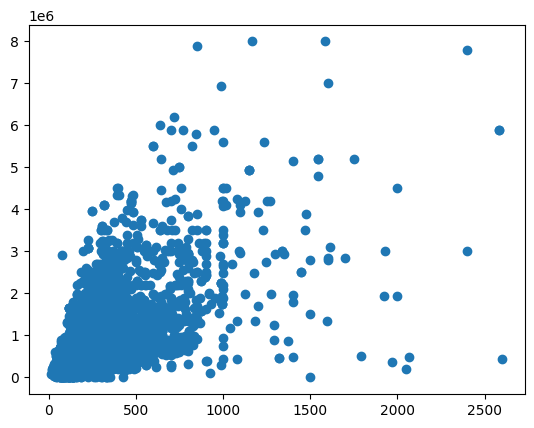

In [124]:
# Filtrar propiedades con superficie menor a 3000 metros cuadrados y graficar la relaci√≥n entre superficie y precio
filter = df[df['surface'] < 3000]  # Filtrar las propiedades con superficie menor a 3000 m¬≤

# Crear un gr√°fico de dispersi√≥n (scatter plot) de superficie frente a precio
plt.scatter(filter['surface'], filter['price'])

# Mostrar el gr√°fico
plt.show()

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df[df['surface'] < 3000]
#       ‚Üí df['surface'] < 3000 crea una condici√≥n booleana que selecciona solo las filas donde la columna 'surface' (superficie)
#         es menor a 3000 metros cuadrados.
#       ‚Üí Esto filtra el DataFrame para obtener solo las propiedades con superficie inferior a 3000 m¬≤.
#       ‚Üí El resultado se guarda en el DataFrame 'filter'.

#   ‚óØ plt.scatter(filter['surface'], filter['price'])
#       ‚Üí plt.scatter(...) crea un gr√°fico de dispersi√≥n, donde:
#           - El eje X (horizontal) representa la superficie de las propiedades (columna 'surface').
#           - El eje Y (vertical) representa el precio de las propiedades (columna 'price').
#       ‚Üí Cada punto en el gr√°fico representa una propiedad filtrada, con su superficie en el eje X y su precio en el eje Y.
#       ‚Üí Este gr√°fico permite visualizar c√≥mo se distribuyen los precios seg√∫n las superficies de las propiedades.

#   ‚óØ plt.show()
#       ‚Üí plt.show() muestra el gr√°fico generado en una ventana de visualizaci√≥n.
#       ‚Üí Esto permite ver la relaci√≥n entre superficie y precio para las propiedades filtradas (con superficie menor a 3000 m¬≤).


### ‚ñ∂ An√°lisis del Gr√°fico ‚óÄ  

**‚óØ Relaci√≥n entre superficie y precio:**
> Se observa una tendencia general en la que propiedades con mayor superficie tienden a tener precios m√°s altos.
> Sin embargo, la relaci√≥n no es lineal, lo que sugiere que hay otros factores adem√°s de la superficie que influyen en el precio.

**‚óØ Alta concentraci√≥n en superficies peque√±as:**
> La mayor√≠a de las propiedades tienen superficies menores a 500 m¬≤, lo que indica que este tipo de viviendas son las m√°s comunes en el dataset.

**‚óØ Alta variabilidad de precios:**
>Para propiedades con menos de 1000 m¬≤, los precios var√≠an considerablemente, desde valores bajos hasta varios millones.
>Esto sugiere que factores como ubicaci√≥n, calidad de construcci√≥n o caracter√≠sticas adicionales pueden afectar el precio.

** ‚óØ Menos propiedades con superficies grandes:**
>A medida que la superficie aumenta, hay menos propiedades en el dataset.
>Adem√°s, los precios de estas propiedades var√≠an ampliamente, con algunas alcanzando valores muy altos.

### ‚ñ∂ Posibles Interpretaciones ‚óÄ  

**‚óØ El precio no depende solo de la superficie:**  
> Aunque hay una relaci√≥n entre la superficie y el precio, la dispersi√≥n de los datos indica que otros factores (ubicaci√≥n, estado de la propiedad, demanda del mercado) tambi√©n influyen en el valor.

**‚óØ Posibles outliers:**  
>    Algunos puntos con precios extremadamente altos o bajos podr√≠an ser valores at√≠picos que vale la pena analizar.

**‚óØ Recomendaciones para un an√°lisis m√°s profundo:**  
>   ‚úîÔ∏è Calcular la correlaci√≥n entre superficie y precio.  
>   ‚úîÔ∏è Aplicar un modelo de regresi√≥n para estimar mejor la relaci√≥n.  
>   ‚úîÔ∏è Segmentar por ubicaci√≥n para analizar diferencias entre regiones.  

**‚óØ Posible transformaci√≥n de datos:**  
   - La mayor√≠a de los datos est√°n concentrados en la parte inferior izquierda del gr√°fico.  
   - Dado que la superficie est√° en **metros cuadrados**, su crecimiento es cuadr√°tico.  
   - Aplicar una **transformaci√≥n** ayudar√≠a a distribuir mejor los datos y facilitar el an√°lisis. Como por ejemplo: 
   1. **la ra√≠z cuadrada:**  
       ‚Üí Reduce la escala de los valores m√°s grandes sin afectar demasiado los peque√±os.  
       ‚Üí √ötil cuando los datos siguen un crecimiento cuadr√°tico.) o  
   2. **el logaritmo:**  
       ‚Üí Convierte distribuciones sesgadas en m√°s sim√©tricas.  
       ‚Üí Se usa para evitar problemas con valores de superficie cercanos a 0.    
>Si lo que buscas es una transformaci√≥n que comprime m√°s los valores altos, el logaritmo natural (np.log) suele ser m√°s efectivo. 
>El logaritmo es especialmente √∫til cuando los datos tienen una distribuci√≥n sesgada a la derecha, como suele ocurrir con el tama√±o de las propiedades.
>Podriamos probar `np.log(filter['surface'])` en lugar de la ra√≠z cuadrada. 
>As√≠ podr√≠amos ver si el patr√≥n se vuelve m√°s claro.
    
   - **Ejemplo para probar:**  
   `df['surface_sqrt'] = np.sqrt(df['surface'])` o   
   `df['surface_log'] = np.log(df['surface'])`.  

üî•Gr√°fico con la ra√≠z cuadrada de la superficie

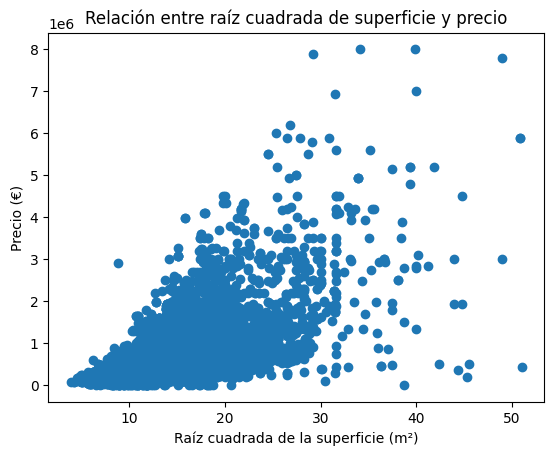

In [125]:
#  Filtrar propiedades con superficie menor a 3000 metros cuadrados y graficar la relaci√≥n entre superficie y precio
filter = df[df['surface'] < 3000].copy()  # Filtrar las propiedades con superficie menor a 3000 m¬≤

# Aplicar la ra√≠z cuadrada a la superficie
filter['surface_sqrt'] = np.sqrt(filter['surface'])

# Crear un gr√°fico de dispersi√≥n (scatter plot) de superficie frente a precio
plt.scatter(filter['surface_sqrt'], filter['price'])

# Etiquetas y t√≠tulo
plt.xlabel('Ra√≠z cuadrada de la superficie (m¬≤)')
plt.ylabel('Precio (‚Ç¨)')
plt.title('Relaci√≥n entre ra√≠z cuadrada de superficie y precio')

# Mostrar el gr√°fico
plt.show()

In [126]:
# La transformaci√≥n con la ra√≠z cuadrada ha comprimido los valores m√°s altos de superficie, 
# lo que reduce un poco la dispersi√≥n en el eje X, pero en general, la forma del gr√°fico 
# sigue siendo similar.
# Por lo que, en general, no hay una gran diferencia con el gr√°fico original anterior.

# Si lo que buscas es una transformaci√≥n que comprime m√°s los valores altos, 
# el logaritmo natural (np.log) suele ser m√°s efectivo. 
# El logaritmo es especialmente √∫til cuando los datos tienen una distribuci√≥n sesgada 
# a la derecha, como suele ocurrir con el tama√±o de las propiedades.
# Podriamos probar np.log(filter['surface']) en lugar de la ra√≠z cuadrada. 
# As√≠ podr√≠amos ver si el patr√≥n se vuelve m√°s claro.

üî•Gr√°fico con el logaritmo natural de la superficie

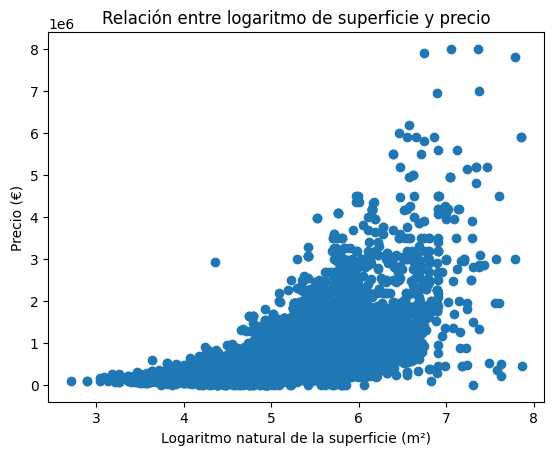

In [127]:
# Aplicar logaritmo natural a la superficie (+1 para evitar log(0))
filter['surface_log'] = np.log(filter['surface']).copy()

# Crear el gr√°fico de dispersi√≥n con la superficie transformada
plt.scatter(filter['surface_log'], filter['price'])

# Etiquetas y t√≠tulo
plt.xlabel('Logaritmo natural de la superficie (m¬≤)')
plt.ylabel('Precio (‚Ç¨)')
plt.title('Relaci√≥n entre logaritmo de superficie y precio')

# Mostrar el gr√°fico
plt.show()

In [128]:
# El gr√°fico es un diagrama de dispersi√≥n que muestra la relaci√≥n entre el logaritmo 
# natural de la superficie (en m¬≤) y el precio (en euros). Aqu√≠ algunas conclusiones:

# Relaci√≥n positiva: 
# Se observa una tendencia creciente, lo que indica que a mayor superficie (en escala logar√≠tmica), 
# el precio tiende a aumentar.

# Variabilidad en los precios: 
# Para superficies similares, los precios pueden variar bastante, lo que sugiere la influencia de 
# otros factores (ubicaci√≥n, calidad, antig√ºedad, etc.).
# 
# Presencia de valores at√≠picos: 
# Hay algunos puntos muy por encima de la tendencia general, lo que indica propiedades con precios 
# significativamente m√°s altos que el resto.
# 
# Crecimiento no completamente lineal: 
# Aunque hay una relaci√≥n positiva, el incremento en el precio parece acelerarse en ciertos rangos 
# de superficie.

#### Ejercicio 12. ¬øCu√°ntas agencia de bienes ra√≠ces contiene el dataset? (‚òÖ‚òÖ‚òÜ)

Imprime el valor obtenido.

In [129]:
df['realEstate_name'].nunique()
print(f"El dataset contiene {df['realEstate_name'].nunique()} agencias de bienes ra√≠ces.")


El dataset contiene 1821 agencias de bienes ra√≠ces.


#### Ejercicio 13. ¬øCu√°l es la poblaci√≥n (columna level5) que contiene la mayor cantidad de casas?(‚òÖ‚òÖ‚òÜ)

Imprima la poblaci√≥n y el n√∫mero de casas.

In [130]:
# Obtener la poblaci√≥n con la mayor cantidad de casas y su respectivo n√∫mero
pop_max = df['level5'].value_counts().idxmax()
num_houses = df['level5'].value_counts().max()

# Imprimir la poblaci√≥n y el n√∫mero de casas
print(f"La poblaci√≥n con la mayor cantidad de casas es{pop_max} con {num_houses} casas.")

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df['level5'].value_counts()
#       ‚Üí .value_counts() cuenta la cantidad de veces que aparece cada valor en la columna 'level5'.
#       ‚Üí Esto devuelve una serie donde los √≠ndices son las poblaciones y los valores son la cantidad 
#         de casas en cada una.

#   ‚óØ .idxmax()
#       ‚Üí .idxmax() obtiene el √≠ndice (poblaci√≥n) con el valor m√°s alto en la serie generada por .value_counts().
#       ‚Üí Esto nos da la poblaci√≥n con la mayor cantidad de casas en el dataset.

#   ‚óØ .max()
#       ‚Üí .max() obtiene el valor m√°s alto de la serie generada por .value_counts().
#       ‚Üí Esto nos da el n√∫mero de casas en la poblaci√≥n con m√°s registros.

#   ‚óØ print(f"La poblaci√≥n con la mayor cantidad de casas es '{pop_max}' con {num_houses} casas.")
#       ‚Üí Se imprime el resultado con un mensaje claro que incluye el nombre de la poblaci√≥n y el n√∫mero de casas.

La poblaci√≥n con la mayor cantidad de casas es Madrid Capital con 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cintur√≥n sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Legan√©s", "Getafe", "Alcorc√≥n" (‚òÖ‚òÖ‚òÜ)

Pista: Filtra el DataFrame original usando la columna `level5` y la funci√≥n `isin`.

In [131]:
# Filtrar el DataFrame para incluir solo las poblaciones del "cintur√≥n sur" de Madrid
df_cs = df[df["level5"].isin(["Fuenlabrada", "Legan√©s", "Getafe", "Alcorc√≥n"])]

# Mostrar las informacion general del dataframe filtrado
print(df_cs.info())

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df["level5"].isin(["Fuenlabrada", "Legan√©s", "Getafe", "Alcorc√≥n"])
#       ‚Üí .isin([...]) verifica si los valores de la columna 'level5' pertenecen a la lista dada.
#       ‚Üí Retorna una serie booleana con True en las filas donde 'level5' coincide con alguna de las poblaciones especificadas.

#   ‚óØ df[df["level5"].isin([...])]
#       ‚Üí Se usa la serie booleana generada por .isin() para filtrar el DataFrame original.
#       ‚Üí Esto devuelve un nuevo DataFrame que solo contiene las filas donde la poblaci√≥n est√° en la lista.

#   ‚óØ df_cs.info()
#       ‚Üí .info() muestra la informacion general del nuevo DataFrame filtrado.
#       ‚Üí Esto permite verificar que el subconjunto se ha creado correctamente.


<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 1 to 15325
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    907 non-null    int64  
 1   isNew             907 non-null    bool   
 2   realEstate_name   907 non-null    object 
 3   phone_realEstate  854 non-null    float64
 4   url_inmueble      907 non-null    object 
 5   rooms             902 non-null    float64
 6   bathrooms         897 non-null    float64
 7   surface           787 non-null    float64
 8   price             907 non-null    int64  
 9   date              907 non-null    object 
 10  description       902 non-null    object 
 11  address           907 non-null    object 
 12  level3            907 non-null    object 
 13  level4            907 non-null    object 
 14  level5            907 non-null    object 
 15  level6            0 non-null      object 
 16  level7            907 non-null    object 
 17  

#### Ejercicio 15. Traza un gr√°fico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (‚òÖ‚òÖ‚òÖ)

Imprima un gr√°fico de barras de la mediana de precios y escriba en la celda Markdown un breve an√°lisis sobre el gr√°fico.

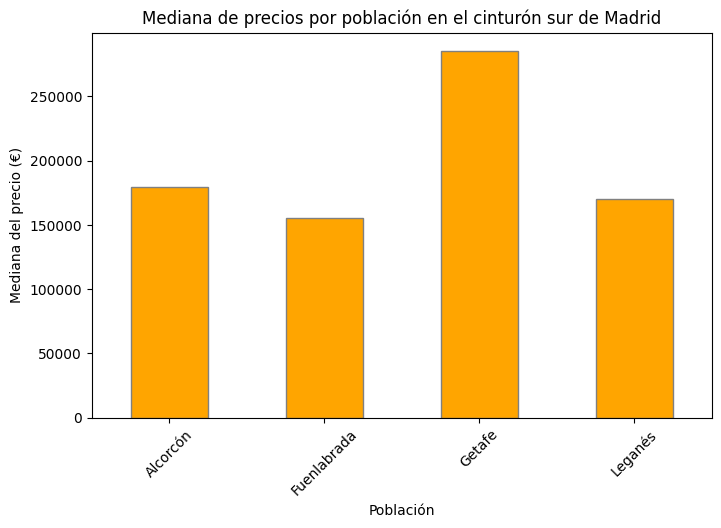

In [132]:
# Calcular la mediana de los precios por poblaci√≥n en el subconjunto df_sur
result = df_cs.groupby("level5")["price"].median()
# otra forma:
# result = df_cs.groupby('level5')['price'].agg('median').to_frame()


# Crear el gr√°fico de barras
plt.figure(figsize=(8, 5))
result.plot(kind="bar", color="orange", edgecolor="gray")

# Agregar t√≠tulo y etiquetas
plt.title("Mediana de precios por poblaci√≥n en el cintur√≥n sur de Madrid")
plt.xlabel("Poblaci√≥n")
plt.ylabel("Mediana del precio (‚Ç¨)")
plt.xticks(rotation=45)

# Mostrar la gr√°fica
plt.show()

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df_cs.groupby("level5")["price"].median()
#       ‚Üí .groupby("level5") agrupa los datos por poblaci√≥n.
#       ‚Üí ["price"] selecciona la columna de precios dentro de cada grupo.
#       ‚Üí .median() calcula la mediana de los precios dentro de cada grupo (poblaci√≥n).

#   ‚óØ plt.figure(figsize=(8, 5))
#       ‚Üí Crea una nueva figura con tama√±o 8x5 pulgadas para mejorar la visualizaci√≥n.

#   ‚óØ median_prices.plot(kind="bar", color="skyblue", edgecolor="black")
#       ‚Üí .plot(kind="bar") genera un gr√°fico de barras usando los datos calculados.
#       ‚Üí color="skyblue" asigna un color azul claro a las barras.
#       ‚Üí edgecolor="black" a√±ade un borde negro a las barras para mayor contraste.

#   ‚óØ plt.title("Mediana de precios por poblaci√≥n en el cintur√≥n sur de Madrid")
#       ‚Üí Asigna un t√≠tulo al gr√°fico para describir su contenido.

#   ‚óØ plt.xlabel("Poblaci√≥n") y plt.ylabel("Mediana del precio (‚Ç¨)")
#       ‚Üí Etiquetan los ejes para indicar qu√© representan los datos.

#   ‚óØ plt.xticks(rotation=45)
#       ‚Üí Rota las etiquetas del eje X para que sean m√°s legibles.

#   ‚óØ plt.show()
#       ‚Üí Muestra el gr√°fico en la salida de la celda.


### üìä An√°lisis del gr√°fico

El gr√°fico de barras muestra la **mediana de los precios de las viviendas** en cuatro poblaciones del "cintur√≥n sur" de Madrid:  
**Alcorc√≥n, Fuenlabrada, Getafe y Legan√©s**.  

#### üîé Observaciones clave  
- **Getafe tiene la mediana de precio m√°s alta**, superando los **270,000 ‚Ç¨**.  
  - Esto sugiere que, en promedio, las viviendas en Getafe son m√°s costosas que en las otras tres poblaciones del an√°lisis.  
- **Fuenlabrada tiene la mediana de precio m√°s baja**, alrededor de **150,000 ‚Ç¨**.  
  - Dentro del cintur√≥n sur, es la zona con viviendas m√°s asequibles.  
- **Alcorc√≥n y Legan√©s tienen precios similares**, con medianas en el rango de **160,000 ‚Ç¨ - 180,000 ‚Ç¨**,  
  - Posicion√°ndose en un nivel intermedio dentro de este grupo de ciudades.  
- La diferencia entre **Getafe y Fuenlabrada es significativa**,  
  - Lo que podr√≠a deberse a factores como ubicaci√≥n, demanda, calidad de vida o servicios disponibles en cada zona.  

#### üìå Conclusi√≥n  
El gr√°fico muestra una **variabilidad clara en los precios medianos** de la vivienda dentro del cintur√≥n sur de Madrid.  
- **Getafe se destaca como la localidad m√°s cara**,  
- **Fuenlabrada es la m√°s asequible**.  

Esto puede ser √∫til para compradores e inversionistas al evaluar opciones dentro de estas zonas. üöÄ


#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y ba√±os (debes usar el subconjunto obtenido del Ejercicio 14) (‚òÖ‚òÖ‚òÖ)

Imprime ambos valores por cada variable.

In [133]:
# Calcular la media y la varianza de muestra para las columnas: 'price', 'rooms', 'surface', 'bathrooms'
result = df_cs[['price','rooms','surface','bathrooms']].describe().T  # .describe() genera estad√≠sticas descriptivas de las columnas seleccionadas
result.iloc[:,1:3]  # Seleccionamos las columnas que contienen la media (mean) y la varianza (std) de las variables

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df_cs[['price','rooms','surface','bathrooms']]
#       ‚Üí Seleccionamos las columnas relevantes: `price`, `rooms`, `surface` y `bathrooms` del DataFrame `df_cs`.
#       ‚Üí Esto filtra las columnas que queremos analizar, que son las variables que nos interesan para el c√°lculo de la media y varianza.

#   ‚óØ .describe()
#       ‚Üí La funci√≥n `.describe()` genera un resumen estad√≠stico de las columnas seleccionadas.
#       ‚Üí Incluye medidas como la media, desviaci√≥n est√°ndar, valores m√≠nimos, cuartiles, y m√°ximo para cada columna.

#   ‚óØ .T
#       ‚Üí `.T` transpuesta el DataFrame resultante para tener las estad√≠sticas descriptivas en filas en lugar de columnas.
#       ‚Üí Esto facilita la visualizaci√≥n de las estad√≠sticas de cada columna de forma vertical.

#   ‚óØ result.iloc[:,1:3]
#       ‚Üí `iloc[:,1:3]` selecciona las columnas que contienen la media (`mean`) y la desviaci√≥n est√°ndar (`std`).
#       ‚Üí La desviaci√≥n est√°ndar (`std`) se usa com√∫nmente como una aproximaci√≥n de la varianza (ya que es la ra√≠z cuadrada de la varianza).
#       ‚Üí Esto devuelve las estad√≠sticas espec√≠ficas de inter√©s: media y varianza de muestra para cada variable.

# Imprime los valores de la media y la varianza para cada variable


mean            std
price      223094.480706  122153.049524
rooms           3.017738       0.847871
surface       111.752224      65.292050
bathrooms       1.633222       0.756173

#### Ejercicio 17. ¬øCu√°l es la casa m√°s cara de cada poblaci√≥n? Debes usar el subset obtenido en la pregunta 14 (‚òÖ‚òÖ‚òÜ)

Imprime tanto la direcci√≥n como el precio de la casa seleccionada de cada poblaci√≥n. Puedes imprimir un DataFrame o una sola l√≠nea para cada poblaci√≥n.

In [134]:
# Obtener la fila completa donde el precio es el m√°ximo en cada poblaci√≥n
max_houses = df_cs.loc[df_cs.groupby('level5')['price'].idxmax(), ['level5', 'address', 'price']]

# Ordenar los resultados de mayor a menor seg√∫n el precio
max_houses = max_houses.sort_values(by='price', ascending=False)

# Imprimir sin la columna de √≠ndices
print(max_houses.to_string(index=False))

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ df_cs.groupby('level5')['price'].idxmax()
#       ‚Üí `groupby('level5')['price'].idxmax()` encuentra el √≠ndice de la fila donde el precio es m√°ximo en cada poblaci√≥n.
#       ‚Üí Retorna una Serie con los √≠ndices de las casas m√°s caras.

#   ‚óØ df_cs.loc[ ... , ['level5', 'address', 'price']]
#       ‚Üí `df_cs.loc[...]` usa los √≠ndices encontrados para seleccionar las filas correspondientes en el DataFrame original.
#       ‚Üí Seleccionamos las columnas 'level5' (poblaci√≥n), 'address' (direcci√≥n) y 'price' (precio m√°ximo).

#   ‚óØ .sort_values(by='price', ascending=False)
#       ‚Üí `.sort_values(by='price', ascending=False)` ordena el DataFrame de mayor a menor seg√∫n el precio.

#   ‚óØ .to_string(index=False)
#       ‚Üí `.to_string(index=False)` imprime el DataFrame sin la columna de √≠ndices.
#       ‚Üí As√≠ evitamos mostrar la numeraci√≥n autom√°tica de pandas.


     level5                               address   price
     Getafe                                Getafe 1050000
   Alcorc√≥n                              Alcorc√≥n  950000
    Legan√©s          Avenida Reina Sof√≠a, Legan√©s  650000
Fuenlabrada Calle de Paulo Freire, 5, Fuenlabrada  490000


#### Ejercicio 18. Normaliza la variable de precios para cada poblaci√≥n y traza los 4 histogramas en el mismo gr√°fico (debes usar el subconjunto obtenido en la pregunta 14) (‚òÖ‚òÖ‚òÖ)

Para el m√©todo de normalizaci√≥n, puedes usar el que consideres adecuado, no hay una √∫nica respuesta correcta para esta pregunta. Imprime el gr√°fico y escribe en la celda de Markdown un breve an√°lisis sobre el gr√°fico.

Pista: Puedes ayudarte revisando la demostraci√≥n multihist de Matplotlib.

#### üî•**Normalizacion:**  
##### üü° **¬øQu√© es la Normalizaci√≥n?**  
La **normalizaci√≥n** es una t√©cnica para escalar los valores de una variable a un **rango espec√≠fico**, normalmente entre **0 y 1**. Se usa cuando los datos tienen rangos muy distintos y queremos hacerlos comparables.  

Por ejemplo, si tienes precios de casas que van desde **50,000** hasta **2,000,000**, el rango es muy grande. Si en otro an√°lisis tienes una variable como "n√∫mero de habitaciones" (que va de **1 a 10**), las escalas son muy diferentes.  

Sin normalizar, el precio dominar√≠a cualquier an√°lisis, ya que sus valores son mucho mayores que los de las habitaciones.  

La f√≥rmula de **Min-Max Normalization** es:


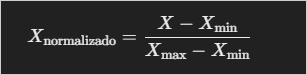


Donde:  
- X es el valor original de la variable.  
- X_min es el valor m√≠nimo de la variable.  
- X_max es el valor m√°ximo de la variable.  
- X_normalizado es el valor transformado, que siempre estar√° entre **0 y 1**.  

---

#### üü° **¬øPor qu√© los valores quedan entre 0 y 1?**  
Imagina que en una ciudad el precio m√°s barato de una casa es **50,000** y el m√°s caro es **2,000,000**.  
Si queremos normalizar un precio de **500,000**, hacemos:  

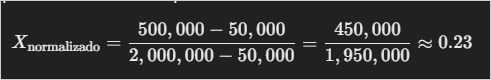


- El **precio m√°s bajo** (50,000) se convierte en **0**.  
- El **precio m√°s alto** (2,000,000) se convierte en **1**.  
- Todos los dem√°s valores se distribuyen entre **0 y 1** seg√∫n su posici√≥n relativa.  

---

#### üü° **¬øCu√°ndo es √∫til normalizar?**
‚úÖ **Para comparar variables con diferentes escalas**  
Si una variable tiene valores muy grandes (como precios de casas) y otra valores peque√±os (como n√∫mero de habitaciones), normalizar permite analizarlas juntas.  

‚úÖ **Para algoritmos de Machine Learning**  
Algunos modelos (como regresi√≥n log√≠stica, redes neuronales, KNN, etc.) funcionan mejor cuando los datos est√°n normalizados. Evita que una variable con valores grandes domine el modelo.  

‚úÖ **Para visualizar mejor los datos**  
Si graficamos varias poblaciones con precios muy diferentes, normalizar permite comparar la distribuci√≥n de precios sin que una poblaci√≥n con precios muy altos opaque a las dem√°s.  

---

#### üü° **Resumen r√°pido:**  
- üîπ La normalizaci√≥n transforma los valores de una variable a un rango **entre 0 y 1**.  
- üîπ Se usa cuando las escalas de los datos son muy diferentes.  
- üîπ Permite comparar variables en igualdad de condiciones.  
- üîπ Es clave para algunos algoritmos de Machine Learning y para hacer gr√°ficos m√°s claros.



In [135]:

# Como nuestros datos estan en escalas diferentes, es necesario normalizarlos.

#üü° Definir la funci√≥n para normalizar precios usando Min-Max Scaling
def min_max_normalize(df):
    min_price = df['price'].min()  # Obtener el precio m√≠nimo en la poblaci√≥n
    max_price = df['price'].max()  # Obtener el precio m√°ximo en la poblaci√≥n
    df['norm'] = (df['price'] - min_price) / (max_price - min_price)  # Normalizar la columna 'price'
    return df

#üü° Aplicar la normalizaci√≥n a cada poblaci√≥n
df_cs.groupby('level5').apply(min_max_normalize)

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ def min_max_normalize(df):
#       ‚Üí Definimos una funci√≥n para normalizar los precios dentro de cada poblaci√≥n.
#       ‚Üí Se usa la t√©cnica de Min-Max Scaling, que convierte los valores entre 0 y 1.

#   ‚óØ min_price = df['price'].min()
#       ‚Üí Se obtiene el precio m√≠nimo dentro de la poblaci√≥n espec√≠fica.

#   ‚óØ max_price = df['price'].max()
#       ‚Üí Se obtiene el precio m√°ximo dentro de la poblaci√≥n espec√≠fica.

#   ‚óØ df['norm'] = (df['price'] - min_price) / (max_price - min_price)
#       ‚Üí Aplicamos la f√≥rmula de normalizaci√≥n Min-Max a la columna 'price'.
#       ‚Üí Los precios de cada poblaci√≥n quedar√°n escalados entre 0 y 1.

#   ‚óØ df_cs.groupby('level5').apply(min_max_normalize)
#       ‚Üí Se agrupa el DataFrame `df_cs` por la columna 'level5' (poblaci√≥n).
#       ‚Üí Se aplica la normalizaci√≥n a cada poblaci√≥n por separado.
#       ‚Üí El resultado se guarda en la nueva columna 'norm' en `df_cs`.

/tmp/ipykernel_3473/955324378.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cs.groupby('level5').apply(min_max_normalize)


id_realEstates  isNew  \
level5                                  
Alcorc√≥n 85          153152077  False   
         109         153586414  False   
         765         154002468   True   
         816         154001779   True   
         827         154001766   True   
...                        ...    ...   
Legan√©s  15015       153905987  False   
         15024       152450071  False   
         15238       153834575  False   
         15263       153903771  False   
         15291       151697757  False   

                                          realEstate_name  phone_realEstate  \
level5                                                                        
Alcorc√≥n 85                       sinergical inmobiliaria               NaN   
         109              area uno asesores inmobiliarios       912664081.0   
         765                                         raul               NaN   
         816                                      deplace       910750918.0   
         827                 tecnocasa ciudad de alcorcon       911795412.0   
...                                                   ...               ...   
Legan√©s  15015                          outletdeviviendas       912172097.0   
         15024                    vivienda madrid leganes       911799348.0   
         15238                          tecnocasa leganes       912665579.0   
         15263  aliseda servicios de gestion inmobiliaria       911368198.0   
         15291                                    unipiso       912788631.0   

                                                     url_inmueble  rooms  \
level5                                                                     
Alcorc√≥n 85     https://www.fotocasa.es/es/comprar/vivienda/le...    1.0   
         109    https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
         765    https://www.fotocasa.es/es/comprar/vivienda/ma...    4.0   
         816    https://www.fotocasa.es/es/comprar/vivienda/la...    3.0   
         827    https://www.fotocasa.es/es/comprar/vivienda/la...    3.0   
...                                                           ...    ...   
Legan√©s  15015  https://www.fotocasa.es/vivienda/getafe/calle-...    2.0   
         15024  https://www.fotocasa.es/vivienda/getafe/calle-...    3.0   
         15238  https://www.fotocasa.es/es/comprar/vivienda/pa...    3.0   
         15263  https://www.fotocasa.es/es/comprar/vivienda/fu...    4.0   
         15291  https://www.fotocasa.es/es/comprar/vivienda/al...    3.0   

                bathrooms  surface   price                          date  ...  \
level5                                                                    ...   
Alcorc√≥n 85           1.0     50.0  107000   2019-12-28T18:30:53.960102Z  ...   
         109          3.0    142.0  425000  2019-12-28T18:32:32.5337942Z  ...   
         765          2.0    109.0  248000          2019-12-28T17:10:00Z  ...   
         816          2.0     96.0  299000          2019-12-28T13:04:00Z  ...   
         827          1.0     65.0  119900          2019-12-28T12:59:00Z  ...   
...                   ...      ...     ...                           ...  ...   
Legan√©s  15015        1.0     74.0  114000          2019-12-18T05:07:00Z  ...   
         15024        2.0    102.0  259800          2019-12-18T05:00:00Z  ...   
         15238        1.0     72.0   89900          2019-12-17T19:26:00Z  ...   
         15263        3.0    249.0  390004          2019-12-17T19:02:00Z  ...   
         15291        2.0    110.0  279000          2019-12-17T18:57:00Z  ...   

                           level4    level5 level6  \
level5                                               
Alcorc√≥n 85     Alcorc√≥n, Zona de  Alcorc√≥n    NaN   
         109    Alcorc√≥n, Zona de  Alcorc√≥n    NaN   
         765    Alcorc√≥n, Zona de  Alcorc√≥n    NaN   
         816    Alcorc√≥n, Zona de  Alcorc√≥n    NaN   
         827    Alcorc√≥n, Zona de  Alcorc√≥n    NaN   
...           

/tmp/ipykernel_3473/2428051287.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop = True)


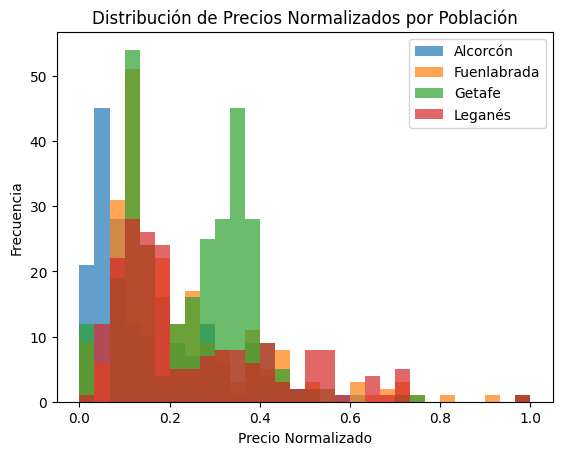

In [136]:
#üü° Normalizar los precios para cada poblaci√≥n y graficar histogramas

# La pista menciona "demostraci√≥n multihist de Matplotlib", lo que sugiere el uso de la 
# funci√≥n plt.hist() con m√∫ltiples conjuntos de datos superpuestos en un mismo gr√°fico.
# En nuestro c√≥digo ya estamos utilizando esta t√©cnica, porque:
#   ‚Üí Agrupamos los datos por poblaci√≥n (level5).
#   ‚Üí Aplicamos normalizaci√≥n a la columna de precios.
#   ‚Üí Usamos plt.hist() con alpha=0.7 para superponer los histogramas.

result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop = True)
for city in result['level5'].unique():
    city_data = result[result['level5']==city]
    plt.hist(city_data['norm'], label=city, alpha=0.7, bins=30)

plt.title("Distribuci√≥n de Precios Normalizados por Poblaci√≥n")  # T√≠tulo del gr√°fico
plt.xlabel("Precio Normalizado")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.legend()  # Muestra la leyenda con los nombres de las poblaciones
plt.show()

# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ: 

# ‚óØ result = df_cs.groupby('level5').apply(min_max_normalize).reset_index(drop=True)
#     ‚Üí Agrupa el DataFrame por la columna 'level5' (poblaci√≥n).
#     ‚Üí Aplica la funci√≥n min_max_normalize() a cada grupo, normalizando los precios dentro de cada poblaci√≥n.
#     ‚Üí reset_index(drop=True) elimina el √≠ndice jer√°rquico creado por groupby().apply(), manteniendo un 
#       DataFrame plano.

# ‚óØ for city in result['level5'].unique():
#     ‚Üí Itera sobre cada poblaci√≥n √∫nica dentro de la columna 'level5'.
#     ‚Üí unique() devuelve una lista de nombres de ciudades sin duplicados.

#   ‚óØ city_data = result[result['level5'] == city]
#       ‚Üí Filtra el DataFrame 'result' para obtener solo los datos de la ciudad actual en la iteraci√≥n.

#   ‚óØ plt.hist(city_data['norm'], label=city, alpha=0.5)
#       ‚Üí Crea un histograma con los valores normalizados de la ciudad actual.
#       ‚Üí label=city asigna el nombre de la ciudad como etiqueta para la leyenda del gr√°fico.
#       ‚Üí alpha=0.5 ajusta la transparencia para que los histogramas no opaquen completamente a los dem√°s.
#       ‚Üí Agrega etiquetas y titulos al grafico

#   ‚óØ bins=30  
#       ‚Üí bins define el n√∫mero de divisiones en el histograma.  
#       ‚Üí Un valor m√°s alto (como 30) permite ver con m√°s detalle la distribuci√≥n de los 
#         precios normalizados.  
#           Bin bajo: Menos de 10 (muy general).
#           Bin est√°ndar: 20-30 (bueno para la mayor√≠a de los casos).
#           Bin alto: M√°s de 50 (detallado, pero con riesgo de ruido)
#       ‚Üí Si el valor es demasiado bajo, el histograma puede ser demasiado general y perder 
#         informaci√≥n.  
#       ‚Üí Si es demasiado alto, puede mostrar demasiado ruido y dificultar la interpretaci√≥n.  
#       ‚Üí Si no colocas el parametro bins en un histograma, el valor por defecto es generalmente 10

# ‚óØ plt.show()
#     ‚Üí Muestra el gr√°fico con los histogramas de todas las poblaciones superpuestos.


#### üî•Conclusiones sobre la Distribuci√≥n de Precios Normalizados por Poblaci√≥n  
Cada barra del histograma nos dice cu√°ntas casas hay en un cierto rango de precios normalizados dentro de cada poblaci√≥n. Una barra m√°s alta indica que hay m√°s casas en ese rango de precios.

##### 1Ô∏è‚É£ La mayor√≠a de los precios est√°n concentrados en valores bajos  
- La mayor parte de las casas tienen precios normalizados entre **0 y 0.4**.  
- Esto indica que hay muchas propiedades con precios relativamente bajos dentro de cada poblaci√≥n.  

##### 2Ô∏è‚É£ Cada poblaci√≥n tiene una distribuci√≥n distinta  
- **Getafe (verde):** Tiene un pico m√°s alto en la zona de **0.3-0.4**, lo que sugiere que muchas casas en esa √°rea est√°n en ese rango de precio normalizado.  
- **Fuenlabrada (naranja) y Alcorc√≥n (azul):** Muestran una mayor concentraci√≥n en el extremo m√°s bajo de los precios normalizados.  
- **Legan√©s (rojo):** Presenta una distribuci√≥n m√°s dispersa, con algunas propiedades en rangos m√°s altos.  

##### 3Ô∏è‚É£ Pocas propiedades tienen precios altos  
- A medida que los precios normalizados aumentan (hacia **1.0**), la frecuencia de propiedades disminuye dr√°sticamente.  
- Esto significa que hay **muy pocas casas** con precios elevados en cada poblaci√≥n.  

##### 4Ô∏è‚É£ Las poblaciones tienen solapamientos en sus precios  
- Hay un gran solapamiento de colores en las primeras barras (**0-0.2**), lo que sugiere que varias poblaciones tienen casas en un rango de precios similar.  
- Sin embargo, en valores m√°s altos, los histogramas tienden a separarse un poco m√°s.  

---

#### üî•Posibles Interpretaciones  
‚úÖ **Si alguien busca una casa barata**, probablemente la encontrar√° en cualquiera de estas poblaciones, ya que la mayor√≠a de los precios est√°n en los rangos m√°s bajos.  
‚úÖ **Si alguien busca casas caras**, habr√° menos opciones, ya que muy pocas propiedades alcanzan valores normalizados cercanos a **1.0**.  



#### Ejercicio 19. ¬øQu√© puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorc√≥n'? Debes usar el subconjunto obtenido en la pregunta 14 (‚òÖ‚òÖ‚òÜ)

Pista: Crea una nueva columna llamada `pps` (price per square en ingl√©s) y luego analiza los valores

/tmp/ipykernel_3473/1077131143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_filtered['pps'] = result_filtered['price'] / result_filtered['surface']


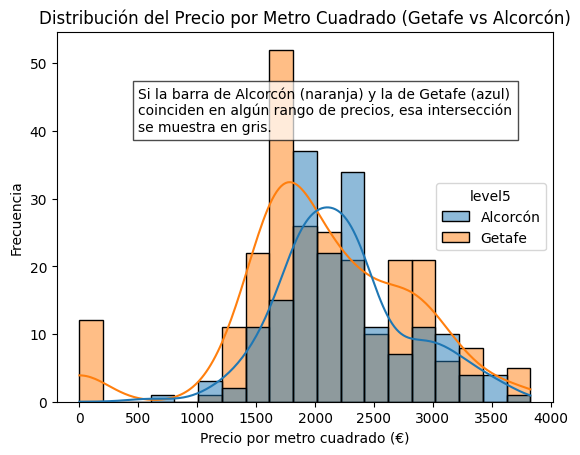

In [137]:
# Filtrar el DataFrame para los municipios 'Getafe' y 'Alcorc√≥n'
municipios = ['Getafe', 'Alcorc√≥n']
result_filtered = result[result['level5'].isin(municipios)]

# Crear la columna 'pps' (precio por metro cuadrado)
result_filtered['pps'] = result_filtered['price'] / result_filtered['surface']

# Crear el histograma para comparar los precios por metro cuadrado
sns.histplot(data=result_filtered, x='pps', hue='level5', kde=True)

#     ‚Üí El par√°metro `data=result_filtered` indica que el DataFrame utilizado es `result_filtered`, 
#       que ya est√° filtrado para los municipios 'Getafe' y 'Alcorc√≥n'.  
#     ‚Üí `x='pps'` especifica que el eje x representar√° los valores de la columna 'pps' (precio por 
#       metro cuadrado).
#     ‚Üí hue='columna': 
#       La columna que se especifica en hue se usa para diferenciar los datos por colores. Cada valor 
#       √∫nico de esa columna recibir√° un color distinto en el gr√°fico.
#       `hue='level5'` utiliza la columna `level5` para diferenciar las distribuciones con diferentes 
#       colores.
#     ‚Üí `kde=True` agrega una curva de densidad (Kernel Density Estimation) sobre el histograma, permitiendo 
#       observar la distribuci√≥n suavizada de los datos, lo que facilita la identificaci√≥n de tendencias o 
#       patrones en los datos.

# Agregar el texto explicativo dentro del gr√°fico:
# Este c√≥digo colocar√° el texto dentro del gr√°fico, explicando visualmente el significado de la superposici√≥n
# de colores.
plt.text(500, 40, 
         "Si la barra de Alcorc√≥n (naranja) y la de Getafe (azul)\n"
         "coinciden en alg√∫n rango de precios, esa intersecci√≥n\n"
         "se muestra en gris.",
         fontsize=10, color="black", bbox=dict(facecolor='white', alpha=0.7))

#     ‚Üí plt.text(x, y, "texto")
#       Agrega el texto dentro del gr√°fico en la posici√≥n (x=500, y=40), que puedes ajustar seg√∫n el 
#       tama√±o del gr√°fico.
#       ¬øQuieres cambiar la posici√≥n del texto dentro del gr√°fico? 
#       Puedes ajustar los valores de x e y en plt.text(x, y, "texto") hasta que se vea en la ubicaci√≥n ideal.
#     ‚Üí \n 
#       Se usa para separar l√≠neas y hacer que el texto sea m√°s legible.
#     ‚Üí fontsize=10 
#       Define el tama√±o del texto.
#     ‚Üí color="black"
#       Color del texto en negro.
#     ‚Üí bbox=dict(facecolor='white', alpha=0.7)
#       Agrega un fondo blanco semitransparente para que el texto sea m√°s legible sobre el gr√°fico.


# Mostrar el gr√°fico
plt.title('Distribuci√≥n del Precio por Metro Cuadrado (Getafe vs Alcorc√≥n)')
plt.xlabel('Precio por metro cuadrado (‚Ç¨)')
plt.ylabel('Frecuencia')
plt.show()



#### üî•Conclusiones sobre el Precio por Metro Cuadrado (Getafe vs Alcorc√≥n)

##### üìå Diferencia en las distribuciones de precios  
- Getafe (naranja) y Alcorc√≥n (azul) presentan distribuciones distintas de precio por metro cuadrado (pps).  
- La curva KDE muestra c√≥mo var√≠an los valores en cada municipio.  

##### üìå Rango de precios predominante  
- **Alcorc√≥n**: Principalmente entre **1,500 - 2,000 ‚Ç¨/m¬≤**.  
- **Getafe**: M√°s disperso, con picos entre **1,500 - 2,200 ‚Ç¨/m¬≤** y algunos valores m√°s altos.  

##### üìå Solapamiento entre municipios  
- Se observa una intersecci√≥n en precios, indicando que hay viviendas en ambos municipios con costos similares.

##### üìå Mayor dispersi√≥n en Getafe  
- Getafe tiene precios m√°s variados, alcanzando los **3,500 ‚Ç¨/m¬≤**.  
- Alcorc√≥n es m√°s estable y concentrado en rangos bajos.  

##### üìå Factores que pueden influir  
- **Ubicaci√≥n**: Mejor conectividad puede elevar precios.  
- **Tipo de vivienda**: M√°s viviendas nuevas o de mayor calidad pueden aumentar la dispersi√≥n.  
- **Demanda**: Mayor inter√©s en un municipio puede reflejarse en precios m√°s altos.  

##### üìå Conclusi√≥n  
 **Getafe muestra precios m√°s altos y dispersos**, mientras que **Alcorc√≥n mantiene una distribuci√≥n m√°s estable en rangos econ√≥micos (1,500 - 2,000 ‚Ç¨/m¬≤)**.  


#### Ejercicio 20. Realiza el mismo gr√°fico para 4 poblaciones diferentes (columna level5) y col√≥calos en el mismo gr√°fico. Debes usar el subconjunto obtenido en la pregunta 14 (‚òÖ‚òÖ‚òÜ) 
Pista: Haz un diagrama de dispersi√≥n de cada poblaci√≥n usando subgr√°ficos (subplots).

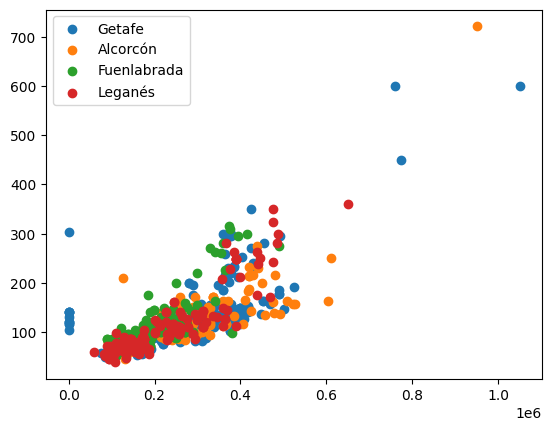

In [138]:
plt.scatter(df_cs[df_cs['level5']=='Getafe']['price'],df_cs[df_cs['level5']=='Getafe']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Alcorc√≥n']['price'],df_cs[df_cs['level5']=='Alcorc√≥n']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Fuenlabrada']['price'],df_cs[df_cs['level5']=='Fuenlabrada']['surface'])
plt.scatter(df_cs[df_cs['level5']=='Legan√©s']['price'],df_cs[df_cs['level5']=='Legan√©s']['surface'])
plt.legend(['Getafe','Alcorc√≥n','Fuenlabrada','Legan√©s'])
plt.show()


# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ: 

#   ‚óØ plt.scatter(x, y)  
#       ‚Üí Se usa para crear un gr√°fico de dispersi√≥n, donde:
#       ‚Üí `x = df_cs[df_cs['level5']=='Getafe']['price']` representa el **precio** de las viviendas en Getafe.
#       ‚Üí `y = df_cs[df_cs['level5']=='Getafe']['surface']` representa la **superficie** en metros cuadrados.
#       ‚Üí Lo mismo se repite para **Alcorc√≥n, Fuenlabrada y Legan√©s**, a√±adiendo puntos en el gr√°fico con diferentes colores.
#
#   ‚óØ plt.legend([...])  
#       ‚Üí Agrega una leyenda para identificar cada municipio en el gr√°fico.
#
#   ‚óØ plt.show()  
#       ‚Üí Muestra el gr√°fico.


#### üî• Conclusiones sobre la Relaci√≥n Precio vs. Superficie (4 Poblaciones)

##### üìå Relaci√≥n esperada entre precio y superficie  
- Se observa una **tendencia positiva**, es decir, **a mayor superficie, mayor precio**, lo cual es esperable en el mercado inmobiliario.

##### üìå Comparaci√≥n entre municipios  
- **Getafe (azul)** tiene varios puntos dispersos en el rango de precios m√°s alto (hasta 1,000,000 ‚Ç¨), lo que indica la presencia de viviendas m√°s costosas en comparaci√≥n con otros municipios.
- **Alcorc√≥n (naranja)** presenta una distribuci√≥n m√°s dispersa en precios, con algunos puntos altos que podr√≠an representar propiedades de lujo o con caracter√≠sticas especiales.
- **Fuenlabrada (verde) y Legan√©s (rojo)** muestran una distribuci√≥n m√°s compacta, con la mayor√≠a de las viviendas en un rango de precios m√°s estable y sin valores extremadamente altos.

##### üìå Outliers o valores at√≠picos  
- Existen algunos puntos muy por encima de la tendencia general (por ejemplo, en Getafe y Alcorc√≥n), lo que sugiere la presencia de **propiedades con precios excepcionalmente altos** o posibles errores en los datos.

##### üìå Superposici√≥n entre municipios  
- Hay una fuerte **superposici√≥n de puntos en la zona de precios bajos y medianos** (hasta 500,000 ‚Ç¨), lo que indica que en estos rangos de precio hay viviendas similares en los cuatro municipios.
- En cambio, en los precios m√°s altos, **Getafe es el √∫nico municipio con valores significativamente m√°s elevados**.

---

##### üìå Conclusi√≥n general  
**La relaci√≥n entre precio y superficie sigue una tendencia positiva en los cuatro municipios**, pero con algunas diferencias:  
- **Getafe tiene viviendas con los precios m√°s altos y mayor dispersi√≥n.**  
- **Fuenlabrada y Legan√©s presentan precios m√°s estables y contenidos.**  
- **Existen valores at√≠picos que podr√≠an ser viviendas de lujo o datos fuera de lo com√∫n.** 


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cintur√≥n sur de Madrid por color de cada poblaci√≥n (debes usar el subconjunto obtenido del Ejercicio 14) (‚òÖ‚òÖ‚òÖ‚òÖ)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un c√≥digo simple que transforme las columnas de coordenadas en un diccionario de Python (agrega m√°s informaci√≥n si es necesario) y agr√©gala al mapa.

In [139]:
# NO FUNCIONO CON ESTA LIBRERIA. ASI QUE PROBAMOS CON OTRA.

# from ipyleaflet import Map, basemaps

# # Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# # Latitud, longitud
# map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
#     basemap=basemaps.Stamen.Terrain)
# map

# # ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ

# #   ‚óØ from ipyleaflet import Map, basemaps
# #     ‚Üí  Importa ipyleaflet, una librer√≠a para visualizar mapas interactivos en Jupyter Notebooks.
# #     ‚Üí  Map: Clase principal para crear un mapa.
# #     ‚Üí  basemaps: Contiene mapas base predefinidos, como Stamen Terrain, OpenStreetMap, etc.

# #   ‚óØ map = Map(center=(60, -2.2), zoom=2, min_zoom=1, max_zoom=20, basemap=basemaps.Stamen.Terrain)
# #     ‚Üí center=(60, -2.2): 
# #       Ubica el centro del mapa en latitud 60¬∞ y longitud -2.2¬∞, pero este valor es arbitrario y debe 
# #       ajustarse a Madrid (center=(40.4, -3.7)).
# #     ‚Üí zoom=2: 
# #       Nivel inicial de acercamiento; valores m√°s altos dan mayor detalle.
# #     ‚Üí min_zoom=1, max_zoom=20: 
# #       Define el rango de acercamiento permitido.
# #     ‚Üí basemap=basemaps.Stamen.Terrain: 
# #       Establece un mapa de fondo con estilo de relieve y terrenos naturales.

# #   ‚óØ map
# #      ‚Üí Renderiza el mapa en el notebook.


#### üëÄ Antes que nada !  
> Es importante verificar el tipo de datos de longitud y latitud. Ya que si no da error el mapa.  
> Tanto longitude como latitude vienen con type object. Sin embargo,  
> **la latitude y la longitude son datos deben definirse como datos que tienen puntos decimales**  
> Entonces aqui debemos cambiar el tipo de datos para evitar este problema.
> Si vemos el sample original, usan la separacion decimal como ",", por eso lo interpreta como object.
> Asi que vamos al df_baking y lo corregimos.


In [140]:
import folium
from folium.plugins import MarkerCluster  # Importa MarkerCluster

# Crear el mapa centrado en la regi√≥n de inter√©s (centro del cintur√≥n sur de Madrid)
map = folium.Map(location=[40.35, -3.75], zoom_start=11, max_bounds=True, width='100%', height='600px')

# Crear un cluster de marcadores
mc = MarkerCluster().add_to(map)

# Agregar los puntos de coordenadas al mapa
for i in range(len(df_cs)):
    lat = df_cs['latitude'].to_list()[i]
    lon = df_cs['longitude'].to_list()[i]
    folium.Marker(location = [lat, lon]).add_to(mc)

# Mostrar el mapa    
map


# ‚ñ∂ Explicaci√≥n por Pasos de Ejecuci√≥n en el flujo del c√≥digo ‚óÄ:

#   ‚óØ map = folium.Map()
#       ‚Üí Crea un mapa base utilizando la librer√≠a Folium.
#       ‚Üí Por defecto, el mapa se centra en (0,0) y debe ajustarse a la ubicaci√≥n deseada.
#           ‚Üí location=[40.35, -3.75] ‚Üí Centra el mapa en una zona estrat√©gica del cintur√≥n sur de Madrid..
#           ‚Üí zoom_start=11 ‚Üí Ajusta el nivel de zoom para abarcar Alcorc√≥n, Getafe, Fuenlabrada y Legan√©s.      
#           ‚Üí max_bounds=True ‚Üí Restringe el desplazamiento fuera del mapa.
#           ‚Üí width='100%' ‚Üí El mapa ocupar√° todo el ancho disponible.
#           ‚Üí height='600px' ‚Üí Define la altura en p√≠xeles.


#   ‚óØ mc = MarkerCluster().add_to(map)
#       ‚Üí Crea un grupo de marcadores que se agrupar√°n autom√°ticamente si est√°n cerca.
#       ‚Üí Se a√±ade al mapa para mejorar la visualizaci√≥n de m√∫ltiples puntos.

#   ‚óØ for i in range(len(df_cs)):
#       ‚Üí Itera sobre cada fila del DataFrame `df_cs` para obtener las coordenadas.

#   ‚óØ lat = df_cs['latitude'].to_list()[i]
#       ‚Üí Extrae la latitud de la fila `i`, convirtiendo la columna en una lista.

#   ‚óØ lon = df_cs['longitude'].to_list()[i]
#       ‚Üí Extrae la longitud de la fila `i` de la misma forma.

#   ‚óØ folium.Marker(location = [lat, lon]).add_to(mc)
#       ‚Üí Crea un marcador en el mapa en la ubicaci√≥n `[lat, lon]`.
#       ‚Üí Luego, lo agrega al grupo de marcadores `mc`.

#   ‚óØ map
#       ‚Üí Renderiza y muestra el mapa con todos los marcadores agregados.


Observamos que hay 11 datos que tienen errores en la longitud y latitud, ya que los ubica en el osceano.

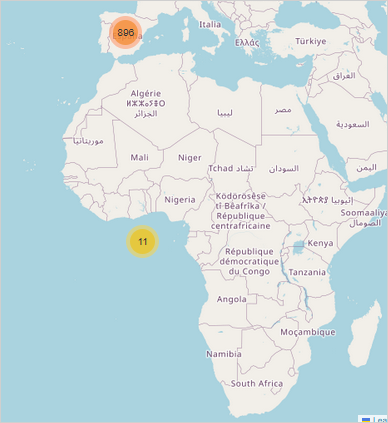

Por otro lado, al hacer zoom, vemos las 3 localidades donde se centralizan las viviendas:

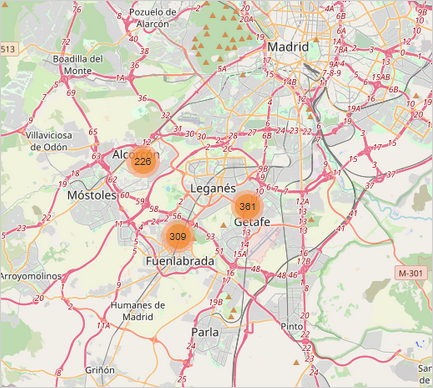


